### Principle Component Analysis (PCA)

In [32]:
import numpy as np
import pandas as pd

In [33]:
df =  pd.read_csv(r'D:\datas\excel\Day32 MNIST\digit-recognizer\train.csv')


In [34]:
df.shape

(42000, 785)

In [35]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [36]:
import matplotlib.pyplot as plt


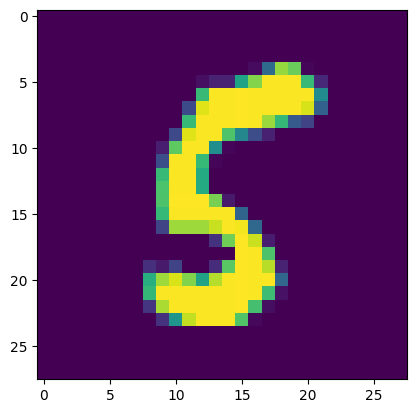

In [37]:

plt.imshow(df.iloc[186,1:].values.reshape(28,28))

In [38]:
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train,y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(33600, 784)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
import time
start = time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

6.298091650009155


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.9648809523809524

### adding pca

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scalar = StandardScaler()

In [50]:
X_train = scalar.fit_transform(X_train)

In [51]:
X_test=scalar.fit_transform(X_test)

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=200)

In [54]:
X_train_trf=pca.fit_transform(X_train)

In [55]:
X_test_trf= pca.fit_transform(X_test)

In [56]:
X_train_trf.shape

(33600, 200)

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test_trf)

In [60]:
accuracy_score(y_test,y_pred)

0.669404761904762

In [61]:
for i in range(1,100):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf= pca.fit_transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)

    print(i," ",(accuracy_score(y_test,y_pred)*100))
    

1   25.511904761904763
2   32.416666666666664
3   50.45238095238095
4   65.51190476190476
5   72.30952380952381
6   81.82142857142857
7   83.57142857142857
8   86.39285714285714
9   87.6547619047619
10   76.23809523809524
11   77.35714285714286
12   77.8452380952381
13   72.09523809523809
14   73.40476190476191
15   75.8452380952381
16   76.20238095238095
17   75.35714285714286
18   76.48809523809523
19   75.86904761904762
20   68.91666666666667
21   67.08333333333333
22   74.45238095238095
23   73.30952380952381
24   69.60714285714286
25   72.27380952380953
26   72.94047619047619
27   71.75
28   71.63095238095238
29   71.51190476190476
30   70.14285714285714
31   72.19047619047619
32   70.5952380952381
33   70.85714285714285
34   71.33333333333334
35   69.86904761904762
36   70.14285714285714
37   70.65476190476191
38   68.84523809523809
39   69.30952380952381
40   67.67857142857143
41   70.19047619047619
42   70.14285714285714
43   69.97619047619048
44   70.84523809523809
45   69.797

In [62]:
# transforming into a 2D

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [63]:
X_train_trf

array([[-2.7186426 , -0.48943493],
       [-0.67700183, -6.75311613],
       [-3.03324603,  6.50952972],
       ...,
       [ 2.14881986,  0.78055474],
       [ 1.05958642,  0.94781499],
       [17.70261984,  1.96203005]])

In [64]:
import plotly.express as px

In [65]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [66]:
# transforming into a 3D

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [67]:
X_train_trf

array([[-2.71865825, -0.48949599,  1.1357351 ],
       [-0.67690627, -6.75415936, -2.3361785 ],
       [-3.03328071,  6.50981284,  7.49143607],
       ...,
       [ 2.14882543,  0.7806243 , -0.74874445],
       [ 1.05952614,  0.94841688,  3.94999638],
       [17.7026011 ,  1.96199122, -4.94257421]])

In [68]:
y_train_trf=y_train.astype(str)
fig =px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],
                   color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [69]:
pca.explained_variance_

array([40.87278367, 28.96628016, 27.04279978])

In [70]:
pca.components_

array([[ 1.51495100e-17,  2.63465348e-19,  3.50925019e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.67886138e-17, -9.13071995e-18, -1.42717843e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.57694653e-17,  1.77180746e-17,  2.63050210e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [71]:
pca.components_.shape

(3, 784)

In [72]:
pca.explained_variance_ratio_

array([0.06054506, 0.0429079 , 0.04005864])

In [73]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [74]:
pca.explained_variance_.shape

(784,)

In [75]:
pca.components_

array([[-5.63042473e-19, -5.55111512e-17, -1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.84793486e-19, -5.55111512e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.44582207e-19,  8.32667268e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -7.98146112e-02, -1.19886608e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  5.15527627e-02,  1.40365584e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.01566283e-02, -2.52382470e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

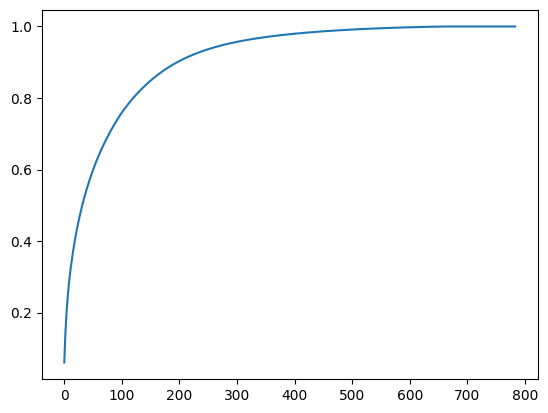

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))